In [259]:
import os

notebook_path = os.getcwd()
print(notebook_path)

C:\Users\noonaja


In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import ExcelWriter


In [261]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

* Import dataframe and check that columns and rows have been loaded

In [262]:
df = pd.read_csv(r"G:\front office\Rates\Sales Delivery\Noonan()\Sagar\ytd.csv", encoding = 'unicode_escape')
df.shape

(471, 27)

* Replace spaces in columns with an _    This will make it easier to query columns further in the report.

In [263]:
cols=df.columns
#This will replace any spaces in the column name with an _
cols = cols.map(lambda x: x.replace(' ', '_')if isinstance(x, (str,)) else x)
df.columns = cols


In [264]:
df.replace(" ","")

,ï»¿L3_Name,Product,Inquiry_Origin_System,RFQ_\n_Inquiry_\nVol_$m,RFQ_\nExecuted_\nVol_$m,RFQ_\nAverage_Dealers_\nVol,RFQ_\nAdj_Hit_Rate_\n(Vol),RFQ_\nQuote__Rate_\n(Vol),RFQ__\nCover_Rate__\n(Vol),RFQ__\nTied_Rate__\n(Vol),RFQ__\nTied_Conversion_Rate_%_\n(Vol),RFQ_\nInquiry_\nTkts,RFQ_\nExecuted_\nTkts,RFQ_\nAverage_Dealers_\nTkts,RFQ_\nAdj_Hit_Rate_\n(Tkts),RFQ_\nQuote_Rate_\n(Tkts),RFQ__\nCover_Rate__\n(Tkts),RFQ__\nTied_Rate_\n(Tkts),RFQ__\nTied_Conversion_Rate__\n(Tkts),RFQ_\nExecuted_\nDelta_$k,RFQ_\n_Inquiry_\nDelta_$k,RFQ_\nAverage_Dealers_\nDelta,RFQ_\nAdj_Hit_Rate_\n(Delta),RFQ_\nQuote_Rate__\n(Delta),RFQ__\nCover_Rate__\n(Delta),RFQ__\nTied_Rate__\n(Delta),RFQ__\nTied_Conversion_Rate_%_\n(Delta)
0,COMMONWEALTH BANK OF AUSTRALIA (AU),USD IRD,BET,"49,963","1,687",6.0,3%,69%,10%,0%,-,81,3,5.9,4%,79%,10%,0%,-,15,"1,008",6.0,-,76%,7%,0%,-
1,UBS ASSET MANAGEMENT,US Treasuries,BET,"27,257","4,826",4.9,21%,93%,41%,11%,61%,"9,418","2,136",5.0,23%,98%,43%,0%,26%,851,"5,085",5.0,-,93%,39%,8%,63%
2,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,US Treasuries,BET,"26,452",713,4.4,6%,65%,32%,3%,39%,"23,400","1,232",4.5,6%,98%,35%,0%,31%,67,"3,378",4.6,-,49%,32%,4%,36%
3,INVESCO,US Treasuries,BET,"22,881","1,586",4.6,11%,88%,43%,2%,28%,"5,968","2,492",4.9,43%,98%,37%,0%,30%,92,"1,559",4.8,-,97%,19%,3%,23%
4,BANCO DE LA REPUBLICA (COLUMBIA),US Treasuries,BET,"18,852","1,493",5.0,8%,100%,21%,1%,0%,101,4,5.0,4%,100%,37%,0%,0%,177,"2,912",5.1,-,100%,29%,2%,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,LOOMIS SAYLES AND COMPANY LP,US Treasuries,VOX,29,29,1.0,100%,100%,0%,0%,-,1,1,1.0,100%,100%,0%,0%,-,8,8,1.0,-,100%,0%,0%,-
467,BARCLAYS CAPITAL,US Treasuries,VOX,25,25,-,100%,100%,0%,0%,-,1,1,-,100%,100%,0%,0%,-,7,7,-,-,100%,0%,0%,-
468,SWISS RE LTD,US Treasuries,VOX,25,25,-,100%,100%,0%,0%,-,1,1,-,100%,100%,0%,0%,-,20,20,-,-,100%,0%,0%,-
469,VANGUARD GROUP,US Treasuries,VOX,25,0,-,-,100%,-,-,-,1,0,-,-,100%,-,-,-,0,21,-,-,100%,-,-,-


In [265]:
df['RFQ_\n_Inquiry_\nVol_$m'] = df['RFQ_\n_Inquiry_\nVol_$m'].astype('str') 
df['RFQ_\nExecuted_\nVol_$m'] = df['RFQ_\nExecuted_\nVol_$m'].astype('str') 
df['RFQ_\nExecuted_\nTkts'] = df['RFQ_\nExecuted_\nTkts'].astype('str') 
df['RFQ_\nInquiry_\nTkts'] = df['RFQ_\nInquiry_\nTkts'].astype('str') 
df['RFQ_\n_Inquiry_\nDelta_$k'] = df['RFQ_\n_Inquiry_\nDelta_$k'].astype('str')
df['RFQ_\nExecuted_\nDelta_$k'] = df['RFQ_\nExecuted_\nDelta_$k'].astype('str')


In [266]:
df.dtypes

ï»¿L3_Name                                 object
Product                                    object
Inquiry_Origin_System                      object
RFQ_\n_Inquiry_\nVol_$m                    object
RFQ_\nExecuted_\nVol_$m                    object
RFQ_\nAverage_Dealers_\nVol                object
RFQ_\nAdj_Hit_Rate_\n(Vol)                 object
RFQ_\nQuote__Rate_\n(Vol)                  object
RFQ__\nCover_Rate__\n(Vol)                 object
RFQ__\nTied_Rate__\n(Vol)                  object
RFQ__\nTied_Conversion_Rate_%_\n(Vol)      object
RFQ_\nInquiry_\nTkts                       object
RFQ_\nExecuted_\nTkts                      object
RFQ_\nAverage_Dealers_\nTkts               object
RFQ_\nAdj_Hit_Rate_\n(Tkts)                object
RFQ_\nQuote_Rate_\n(Tkts)                  object
RFQ__\nCover_Rate__\n(Tkts)                object
RFQ__\nTied_Rate_\n(Tkts)                  object
RFQ__\nTied_Conversion_Rate__\n(Tkts)      object
RFQ_\nExecuted_\nDelta_$k                  object


In [267]:
df['RFQ_\n_Inquiry_\nVol_$m'] = df['RFQ_\n_Inquiry_\nVol_$m'].str.replace(',', '')
df['RFQ_\nExecuted_\nVol_$m'] = df['RFQ_\nExecuted_\nVol_$m'].str.replace(',', '')
df['RFQ_\nExecuted_\nTkts'] = df['RFQ_\nExecuted_\nTkts'].str.replace(',', '')
df['RFQ_\nInquiry_\nTkts'] = df['RFQ_\nInquiry_\nTkts'].str.replace(',', '')
df['RFQ_\n_Inquiry_\nDelta_$k'] = df['RFQ_\n_Inquiry_\nDelta_$k'].str.replace(',', '')
df['RFQ_\nExecuted_\nDelta_$k'] = df['RFQ_\nExecuted_\nDelta_$k'].str.replace(',', '')

In [268]:
pd.set_option('display.max_columns', None)

#df = df.apply(pd.to_numeric)


Columns_to_convert = ['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m', 'RFQ_\nExecuted_\nTkts', 'RFQ_\n_Inquiry_\nDelta_$k', 'RFQ_\nExecuted_\nDelta_$k', 'RFQ_\nInquiry_\nTkts']

    
for col in Columns_to_convert:
    df[col] = pd.to_numeric(df[col],) #errors='coerce')
    
#print(df)

In [269]:
df.head(5)

,ï»¿L3_Name,Product,Inquiry_Origin_System,RFQ_\n_Inquiry_\nVol_$m,RFQ_\nExecuted_\nVol_$m,RFQ_\nAverage_Dealers_\nVol,RFQ_\nAdj_Hit_Rate_\n(Vol),RFQ_\nQuote__Rate_\n(Vol),RFQ__\nCover_Rate__\n(Vol),RFQ__\nTied_Rate__\n(Vol),RFQ__\nTied_Conversion_Rate_%_\n(Vol),RFQ_\nInquiry_\nTkts,RFQ_\nExecuted_\nTkts,RFQ_\nAverage_Dealers_\nTkts,RFQ_\nAdj_Hit_Rate_\n(Tkts),RFQ_\nQuote_Rate_\n(Tkts),RFQ__\nCover_Rate__\n(Tkts),RFQ__\nTied_Rate_\n(Tkts),RFQ__\nTied_Conversion_Rate__\n(Tkts),RFQ_\nExecuted_\nDelta_$k,RFQ_\n_Inquiry_\nDelta_$k,RFQ_\nAverage_Dealers_\nDelta,RFQ_\nAdj_Hit_Rate_\n(Delta),RFQ_\nQuote_Rate__\n(Delta),RFQ__\nCover_Rate__\n(Delta),RFQ__\nTied_Rate__\n(Delta),RFQ__\nTied_Conversion_Rate_%_\n(Delta)
0,COMMONWEALTH BANK OF AUSTRALIA (AU),USD IRD,BET,49963,1687,6.0,3%,69%,10%,0%,-,81,3,5.9,4%,79%,10%,0%,-,15,1008,6.0,-,76%,7%,0%,-
1,UBS ASSET MANAGEMENT,US Treasuries,BET,27257,4826,4.9,21%,93%,41%,11%,61%,9418,2136,5.0,23%,98%,43%,0%,26%,851,5085,5.0,-,93%,39%,8%,63%
2,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,US Treasuries,BET,26452,713,4.4,6%,65%,32%,3%,39%,23400,1232,4.5,6%,98%,35%,0%,31%,67,3378,4.6,-,49%,32%,4%,36%
3,INVESCO,US Treasuries,BET,22881,1586,4.6,11%,88%,43%,2%,28%,5968,2492,4.9,43%,98%,37%,0%,30%,92,1559,4.8,-,97%,19%,3%,23%
4,BANCO DE LA REPUBLICA (COLUMBIA),US Treasuries,BET,18852,1493,5.0,8%,100%,21%,1%,0%,101,4,5.0,4%,100%,37%,0%,0%,177,2912,5.1,-,100%,29%,2%,0%


* A Salesperson mapping needs to be created to identify which salesperson covers which client.

In [270]:
Salesmapping = df[['ï»¿L3_Name']].copy()
Salesmapping.shape

(471, 1)

In [271]:
SM = Salesmapping.drop_duplicates()
SM.shape
print(SM)

                                            ï»¿L3_Name
0                  COMMONWEALTH BANK OF AUSTRALIA (AU)
1                                 UBS ASSET MANAGEMENT
2            FIRST TENNESSEE BANK NATIONAL ASSOCIATION
3                                              INVESCO
4                     BANCO DE LA REPUBLICA (COLUMBIA)
..                                                 ...
421                            AXA INVESTMENT MANAGERS
454                                   KEPOS CAPITAL LP
461                               INTESA SANPAOLO (IT)
463  CALIFORNIA STATE TEACHERS RETIREMENT SYSTEM (C...
467                                   BARCLAYS CAPITAL

[193 rows x 1 columns]


In [309]:
SalesDict = {"INVESCO"  : 'NOTARO', "GELBER GROUP LLC"   : 'MURPHY', "UBS ASSET MANAGEMENT": 'KELLY', 
             "EXODUSPOINT CAPITAL MANAGEMENT LP" : 'CELANDER', "BANCO DE LA REPUBLICA (COLUMBIA)" : 'MURPHY', 
             "RESERVE BANK OF AUSTRALIA (AU)" : 'NOTARO',
             "GRANTHAM MAYO VAN OTTERLOO AND COMPANY LLC" : "CELANDER", "SWISS RE LTD" : "LEWIS", "JP MORGAN INVESTMENT MANAGEMENT" : "LEWIS", "CITIGROUP GLOBAL MARKETS" : "NOTARO",
             "AMERICAN CENTURY INVESTMENT MANAGEMENT INC" : "CARRION", "BANK OF NEW YORK MELLON (US)" : "LEWIS", "PIMCO" : "CARRION", "MORGAN STANLEY INVESTMENT MANAGEMENT" : "LEWIS", 
             "BANCO CENTRAL DEL URUGUAY" : "MURPHY", "GARDA CAPITAL PARTNERS LP" : "MAGALDI", "RBS TREASURY" : "NOTARO", "TCW AM" : "CARRION",
             "BANCO CENTRAL DO BRASIL" : "MURPHY", "VERITION FUND MANAGEMENT LLC (US)" : "LEWIS", "OREGON STATE TREASURY" : "CARRION", "NORTHERN TRUST CORP (US)" : "KELLY",
             "LMR PARTNERS LLP" : "CELANDER", "DODGE AND COX" : "CARRION", "INTER-AMERICAN DEVELOPMENT BANK" : "MURPHY", "TIAA-CREF (US)" : "LEWIS", 
             "MILLENNIUM MANAGEMENT (US)" : "MURPHY", "FEDERATED INVESTORS" : "LEWIS", "ALLSTATE (US)" : "KELLY", "ROYAL BANK OF CANADA (CA)" : "MAGALDI",
             "VANGUARD GROUP" : "NOTARO", "EMPLOYEES RETIREMENT SYSTEM OF TEXAS" : "KELLY", "STATE OF TEXAS TREASURY" : "KELLY", "BRECKINRIDGE CAPITAL ADVISORS INC" : "CARRION",
             "INTERNATIONAL BANK FOR RECONSTRUCTION & DEVELOPMENT (IBRD US)" : "MURPHY", "FORD MOTOR (US)" : "NOTARO", "DRW INVESTMENTS LLC" : "MAGALDI",
             "DV TRADING LLC" : "CARRION", "INSIGHT INVESTMENT MANAGEMENT (UK)" : "LEWIS", "NEW YORK STATE TEACHERS RETIREMENT SYSTEM" : "MURPHY",
             "BANCO DE MEXICO" : "MURPHY", "WELLS CAPITAL MANAGEMENT" : "CARRION", "BARCLAYS BANK (UK)" : "CELANDER",
             "JEFFERIES GROUP" : "MURPHY", "TUDOR INVESTMENT CORPORATION" : "MAGALDI", "ELLIOTT MANAGEMENT CORPORATION" : "LEWIS",
             "ALLIANCEBERNSTEIN LP" : "KWALWASSER" , "UBS" : "NOTARO" , "RP INVESTMENT ADVISORS" : "NOTARO", "UNITED NATIONS" : "MURPHY", 
             "VOYA FINANCIAL INC" : "MAGALDI", "DENVER INVESTMENTS (US)" : "CARRION", "PAYDEN & RYGEL INC" : "CARRION", "CAPSTONE INVESTMENT ADVISORS" : "LEWIS",
             "ONTARIO TEACHERS PENSIONS PLAN (OTPP CA)" : "MAGALDI", "CANADIAN IMPERIAL BANK OF COMMERCE (CA)" : "MAGALDI", "NATIONAL BANK OF CANADA (CA)" : "MURPHY",
             "ENSIGN PEAK ADVISORS INC" : "CARRION", "JANUS HENDERSON" : "CARRION", "WESTERN AM" : "CARRION", "BANCO CENTRAL DE RESERVA DEL PERU (PE)" : "MURPHY",
             "FIDELITY (FMR)" : "CELANDER", "SQUAREPOINT CAPITAL LLP" : "LEWIS", "PUTNAM IM" : "CELANDER", "SUN LIFE COMPANY OF CANADA" : "CELANDER",
             "BANK OF AMERICA MERRILL LYNCH (BAML)" : "KWALWASSER", "BLUECREST CAPITAL" : "KWALWASSER", "III OFFSHORE ADVISORS" : "MAGALDI",
             "LOOMIS SAYLES AND COMPANY LP" : "CARRION", "MASS FINANCIAL SERVICES (MFS)" : "CELANDER", "US BANK NATIONAL ASSOCIATION (US)" : "MURPHY",
             "MANULIFE" : "CELANDER", "WELLINGTON MANAGEMENT (US)" : "CELANDER", "STATE BOARD OF ADMINISTRATION OF FLORIDA" : "KELLY",
             "STATE STREET" : "CELANDER", "DEUTSCHE BUNDESBANK (DE)" : "MURPHY", "SWISS NATIONALBANK" : "MURPHY", "PGIM INVESTMENTS (PRUDENTIAL)" : "LEWIS",
             "CAPULA INVESTMENT" : "LEWIS", "GSAM" : "CELANDER", "NEUBERGER BERMAN FIXED INCOME LLC" : "KELLY", "NORGES BANK (NO)" : "MURPHY",
             "CPPIB (CA)" : "MAGALDI", "TORONTO DOMINION BANK (CA)" : "MAGALDI", "HEALTHCARE OF ONTARIO PENSION PLAN TRUST FUND (CA)" : "NOTARO",
             "FIRST TENNESSEE BANK NATIONAL ASSOCIATION" : "KWALWASSER", "RENAISSANCE REINSURANCE" : "KWALWASSER", "B RILEY FINANCIAL INC." : "KWALWASSER",
             "MISCHLER FINANCIAL GROUP INC (US)" : "KWALWASSER", "HSBC GLOBAL ASSET MANAGEMENT" : "NOTARO", "DOUBLELINE CAPITAL" : "CARRION",
             "NISA INVESTMENT ADVISORS" : "LEWIS", "BNY MELLON ASSET MANAGEMENT (US)" : "CARRION", "AMUNDI ASSET MANAGEMENT." : "CELANDER", 
             "STATE OF IDAHO" : "MURPHY", "VALLEY NATIONAL BANCORPORATION" : "KWALWASSER", "PRINCIPAL LIFE (US)" : "KWALWASSER",
             "FIFTH THIRD BANK (US)" : "MAGALDI", "PHASE 3 CAPITAL MANAGEMENT LLC" : "MAGALDI", "DAIWA CAPITAL MARKETS AMERICA INC" : "REILLY",
             "BANCROFT CAPITAL LLC" : "KWALWASSER", "AXA INVESTMENT MANAGERS" : "KWALWASSER",  "CALIFORNIA STATE TEACHERS RETIREMENT SYSTEM (CALSTERS)" : "CARRION",
             "UNIVERSITY OF TEXAS INVESTMENT MANAGEMENT COMPANY" : "MURPHY", "STATE OF WASHINGTON" : "CARRION", "STATE OF NEW MEXICO" : "MURPHY",
             "INCAPITAL HOLDINGS LLC" : "KWALWASSER", "MARINER INVESTMENT GROUP" : "MAGALDI", "AEGON" : "KWALWASSER", "GOVERNMENT OF CANADA" : "KWALWASSER",
             "BREVAN HOWARD (UK)" : "MAGALDI", "MACQUARIE INVESTMENT MANAGEMENT BUSINESS TRUST" : "NOTARO", "NEW YORK LIFE INVESTMENT MANAGEMENT LLC" : "NOTARO",
             "KEYBANC CAPITAL MARKETS INC (US)" : "KWALWASSER", "MKP CAPITAL MANAGEMENT LLC" : "MAGALDI", "BARINGS LLC" : "KWALWASSER", 
             "AXONIC CAPITAL LLC (US)" : "CELANDER", "GENERAL RE" : "KWALWASSER", "BARCLAYS CAPITAL" : "CELANDER", "INDEPENDENT BANKERS FINANCIAL CORPORATION" : "KWALWASSER",
             "BNY MELLON BROKER DEALER" : "KWALWASSER", "GRAHAM CAPITAL MANAGEMENT LP" : "KWALWASSER", "AMHERST PIERPONT SECURITIES LLC" : "KWALWASSER",
             "MIO PARTNERS INC" : "NOTARO", "SANDERS MORRIS HARRIS" : "KWALWASSER", "COLORADO PUBLIC EMPLOYEES RETIREMENT ASSOCIATION (PERA)" : "CARRION",
             "ALAMO CAPITAL (US)" : "KWALWASSER", "CITY NATIONAL BANK" : "KWALWASSER", "BNP PARIBAS ASSET MANAGEMENT" : "NOTARO", "WINSHORE CAPITAL PARTNERS LP" : "KWALWASSER",
             "T ROWE PRICE" : "LEWIS", "FEDERATION DES CAISSES DESJARDINS DU QUEBEC" : "MAGALDI", "ASTOR RIDGE NA LLP" : "KWALWASSER", "NAVY FEDERAL CREDIT UNION (US)" : "KWALWASSER",
             "TEACHER RETIREMENT SYSTEM OF TEXAS" : "KELLY", "RICE DERIVATIVE HOLDINGS LP" : "KWALWASSER", "BANCO BILBAO VIZCAYA ARGENTARIA (BBVA ES)" : "NOTARO",
             "HBK INVESTMENTS LP" : "NOTARO", "TRUIST FINANCIAL CORPORATION" : "MAGALDI", "BANCO DE GUATEMALA" : "MURPHY",
             "AQR CAPITAL (US)" : "MAGALDI", "ELLINGTON MANAGEMENT GROUP LLC" : "LEWIS", "MANULIFE ASSET MANAGEMENT LTD (CA)" : "KWALWASSER",
             "CITY OF PORTLAND (US)" : "CARRION", "ALASKA PERMANENT FUND" : "CARRION", "HARTFORD INVESTMENT MANAGEMENT (US)" : "CELANDER",
             "WASHINGTON STATE INVESTMENT BOARD" : "CARRION", "SYMETRA FINANCIAL CORPORATION" : "KWALWASSER", "SYMETRA FINANCIAL CORPORATION" : "KWALWASSER",
             "BANK OF AMERICA NA" : "LEWIS", "BLACKROCK" : "CARRION", "HUNTINGTON NATIONAL BANK (US)" : "KWALWASSER", "NORTHWESTERN MUTUAL LIFE" : "NOTARO",
             "WELLS FARGO BANK NA" : "KWALWASSER", "SUNTRUST ROBINSON HUMPHREY INC" : "KWALWASSER", "CREWS AND ASSOCIATES INC (US)" : "KWALWASSER",
             "DIMENSIONAL FUND ADVISORS INCORPORATED" : "CARRION", "METLIFE INVESTMENT MANAGEMENT LLC (CLIENTS OF)" : "KWALWASSER", 
             "MADISON INVESTMENT ADVISORS LLC" : "KWALWASSER", "THE CAPITAL GROUP" : "CARRION", "SUOMEN PANKKI FINLANDSBANK" : "MURPHY", 
             "BANQUE NATIONALE DE BELGIQUE SA (BE)" : "MURPHY", "ELAN CAPITAL MANAGEMENT LLP" : "MAGALDI", "CALIFORNIA PUBLIC EMPLOYEES RETIREMENT SYSTEM" : "CARRION",
             "ELEMENT CAPITAL MASTER FUND LIMITED" : "LEWIS", "CHARLES SCHWAB" : "CARRION", "KEYBANK NATIONAL ASSOCIATION" : "MAGALDI", "SVERIGES RIKSBANK (SE)" : "MURPHY", 
             "STATE ADMINISTRATION OF FOREIGN EXCHANGE (SAFE)" : "MURPHY", "HSBC BANK" : 'NOTARO', "CAISSE DE DEPOT ET PLACEMENT DU QUEBEC (CA)" : "MAGALDI",
             "COMMONWEALTH BANK OF AUSTRALIA (AU)" : "NOTARO", "CITIZENS FINANCIAL GROUP INC" : "CELANDER", "CARGILL (US)" : "CARRION",  "STANDARD CHARTERED PLC" : "NOTARO",
             "RABOBANK (NL)" : "NOTARO", "FANNIE MAE (FNMA)" : "LEWIS", "WESTPAC BANK (AU)" : "NOTARO", "AMERICAN INTERNATIONAL GROUP" : "MAGALDI",
             "MIZUHO CAPITAL MARKETS" : "REILLY", "SOCIETE GENERALE (SG FR)" : "KWALWASSER", "NATIXIS" : "KWALWASSER", "THE BANK OF NOVA SCOTIA (CA)" : "MAGALDI",
             "SYMMETRY INVESTMENTS LP" : "LEWIS", "REGIONS BANK (US)" : "LEWIS", "CREDIT AGRICOLE CORPORATE AND INVESTMENT BANK" : "NOTARO", 
             "PNC BANK" : "MAGALDI", "KARYA CAPITAL MANAGEMENT LP" : "KWALWASSER", "ABU DHABI INVESTMENT AUTHORITY (ADIA)" : "MURPHY",
             "TILDEN PARK MANAGEMENT I LLC" : "CELANDER", "AXA INSURANCE (US)" : "KWALWASSER", "KEPOS CAPITAL LP" : "CELANDER", "INTESA SANPAOLO (IT)" : "NOTARO",
            "ONE RIVER ASSET MANAGEMENT LLC (US)" : "MAGALDI",
                          
            }

SM['Salesperson'] = SM['ï»¿L3_Name'].map(SalesDict)

print(SM)

                                            ï»¿L3_Name Salesperson
0                  COMMONWEALTH BANK OF AUSTRALIA (AU)      NOTARO
1                                 UBS ASSET MANAGEMENT       KELLY
2            FIRST TENNESSEE BANK NATIONAL ASSOCIATION  KWALWASSER
3                                              INVESCO      NOTARO
4                     BANCO DE LA REPUBLICA (COLUMBIA)      MURPHY
..                                                 ...         ...
421                            AXA INVESTMENT MANAGERS  KWALWASSER
454                                   KEPOS CAPITAL LP    CELANDER
461                               INTESA SANPAOLO (IT)      NOTARO
463  CALIFORNIA STATE TEACHERS RETIREMENT SYSTEM (C...     CARRION
467                                   BARCLAYS CAPITAL    CELANDER

[193 rows x 2 columns]


** Check that every account has a mapped salesperson

In [311]:
nan_values = SM[SM['Salesperson'].isna()]

print (nan_values)

Empty DataFrame
Columns: [ï»¿L3_Name, Salesperson]
Index: []


** This code merges the two dataframes, the initial dump of data and the dictionary of account to salesperson.

In [312]:
MERGE = pd.merge(
...     SM, df)
MERGE.shape

(471, 28)

In [313]:
MERGE.head(40)

,ï»¿L3_Name,Salesperson,Product,Inquiry_Origin_System,RFQ_\n_Inquiry_\nVol_$m,RFQ_\nExecuted_\nVol_$m,RFQ_\nAverage_Dealers_\nVol,RFQ_\nAdj_Hit_Rate_\n(Vol),RFQ_\nQuote__Rate_\n(Vol),RFQ__\nCover_Rate__\n(Vol),RFQ__\nTied_Rate__\n(Vol),RFQ__\nTied_Conversion_Rate_%_\n(Vol),RFQ_\nInquiry_\nTkts,RFQ_\nExecuted_\nTkts,RFQ_\nAverage_Dealers_\nTkts,RFQ_\nAdj_Hit_Rate_\n(Tkts),RFQ_\nQuote_Rate_\n(Tkts),RFQ__\nCover_Rate__\n(Tkts),RFQ__\nTied_Rate_\n(Tkts),RFQ__\nTied_Conversion_Rate__\n(Tkts),RFQ_\nExecuted_\nDelta_$k,RFQ_\n_Inquiry_\nDelta_$k,RFQ_\nAverage_Dealers_\nDelta,RFQ_\nAdj_Hit_Rate_\n(Delta),RFQ_\nQuote_Rate__\n(Delta),RFQ__\nCover_Rate__\n(Delta),RFQ__\nTied_Rate__\n(Delta),RFQ__\nTied_Conversion_Rate_%_\n(Delta)
0,COMMONWEALTH BANK OF AUSTRALIA (AU),NOTARO,USD IRD,BET,49963,1687,6.0,3%,69%,10%,0%,-,81,3,5.9,4%,79%,10%,0%,-,15,1008,6.0,-,76%,7%,0%,-
1,COMMONWEALTH BANK OF AUSTRALIA (AU),NOTARO,USD IRD,TW,2022,100,5.3,7%,76%,10%,0%,-,15,1,5.3,8%,87%,8%,0%,-,6,160,5.3,-,83%,6%,0%,-
2,UBS ASSET MANAGEMENT,KELLY,US Treasuries,BET,27257,4826,4.9,21%,93%,41%,11%,61%,9418,2136,5.0,23%,98%,43%,0%,26%,851,5085,5.0,-,93%,39%,8%,63%
3,UBS ASSET MANAGEMENT,KELLY,US Agencies,BET,139,27,11.4,39%,63%,4%,0%,-,418,10,12.2,40%,8%,10%,0%,-,3,39,11.8,-,78%,3%,0%,-
4,UBS ASSET MANAGEMENT,KELLY,USD SSA,BET,5,0,55.4,-,0%,0%,0%,-,3,0,1.5,-,0%,0%,0%,-,0,0,27.0,-,0%,0%,0%,-
5,UBS ASSET MANAGEMENT,KELLY,US Agencies,TWAGCY,92,7,11.5,9%,57%,10%,0%,-,63,3,11.6,7%,22%,4%,0%,-,1,12,11.6,-,66%,7%,0%,-
6,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,KWALWASSER,US Treasuries,BET,26452,713,4.4,6%,65%,32%,3%,39%,23400,1232,4.5,6%,98%,35%,0%,31%,67,3378,4.6,-,49%,32%,4%,36%
7,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,KWALWASSER,Unclassified,BET,10,0,5.0,0%,10%,59%,0%,-,6,0,5.0,0%,50%,67%,0%,-,0,1,5.0,-,64%,22%,0%,-
8,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,KWALWASSER,US Agencies,BET,1,1,1.0,85%,82%,0%,0%,-,4,2,1.2,78%,50%,0%,0%,-,0,0,1.0,-,97%,0%,0%,-
9,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,KWALWASSER,US Agencies,TWAGCY,0,0,5.8,0%,0%,0%,0%,-,2,0,5.5,0%,0%,0%,0%,-,0,0,5.8,-,0%,0%,0%,-



## Add column for Voice/E


In [314]:
emapping = df[['Inquiry_Origin_System']].copy()
print(emapping)



    Inquiry_Origin_System
0                     BET
1                     BET
2                     BET
3                     BET
4                     BET
..                    ...
466                   VOX
467                   VOX
468                   VOX
469                   VOX
470                   VOX

[471 rows x 1 columns]


In [315]:
EM = emapping.drop_duplicates()
EM.shape
print(EM)

    Inquiry_Origin_System
0                     BET
242                    TW
292                 TWADN
297                TWAGCY
315                TWEUCR
316                TWTRSY
436             TWTRSYTok
446                   VOX


In [316]:
VoiceDict = {"BET"  : 'E', "TW" : 'E', "TWEUCR" : "E", "TWTRSY"   : 'E',  "TWADN" : 'E', "TWAGCY" : 'E', "TWTRSYTok" : 'E', "VOX" : 'Voice', 
             
            }



EM['E.Voice'] = EM['Inquiry_Origin_System'].map(VoiceDict)





print(EM)

    Inquiry_Origin_System E.Voice
0                     BET       E
242                    TW       E
292                 TWADN       E
297                TWAGCY       E
315                TWEUCR       E
316                TWTRSY       E
436             TWTRSYTok       E
446                   VOX   Voice


In [317]:
nan_values = EM[EM['E.Voice'].isna()]

print (nan_values)

Empty DataFrame
Columns: [Inquiry_Origin_System, E.Voice]
Index: []


In [318]:
MERGED = pd.merge(
...     MERGE, EM)
MERGED.shape

(471, 29)

In [319]:
MERGED.head(40)

,ï»¿L3_Name,Salesperson,Product,Inquiry_Origin_System,RFQ_\n_Inquiry_\nVol_$m,RFQ_\nExecuted_\nVol_$m,RFQ_\nAverage_Dealers_\nVol,RFQ_\nAdj_Hit_Rate_\n(Vol),RFQ_\nQuote__Rate_\n(Vol),RFQ__\nCover_Rate__\n(Vol),RFQ__\nTied_Rate__\n(Vol),RFQ__\nTied_Conversion_Rate_%_\n(Vol),RFQ_\nInquiry_\nTkts,RFQ_\nExecuted_\nTkts,RFQ_\nAverage_Dealers_\nTkts,RFQ_\nAdj_Hit_Rate_\n(Tkts),RFQ_\nQuote_Rate_\n(Tkts),RFQ__\nCover_Rate__\n(Tkts),RFQ__\nTied_Rate_\n(Tkts),RFQ__\nTied_Conversion_Rate__\n(Tkts),RFQ_\nExecuted_\nDelta_$k,RFQ_\n_Inquiry_\nDelta_$k,RFQ_\nAverage_Dealers_\nDelta,RFQ_\nAdj_Hit_Rate_\n(Delta),RFQ_\nQuote_Rate__\n(Delta),RFQ__\nCover_Rate__\n(Delta),RFQ__\nTied_Rate__\n(Delta),RFQ__\nTied_Conversion_Rate_%_\n(Delta),E.Voice
0,COMMONWEALTH BANK OF AUSTRALIA (AU),NOTARO,USD IRD,BET,49963,1687,6.0,3%,69%,10%,0%,-,81,3,5.9,4%,79%,10%,0%,-,15,1008,6.0,-,76%,7%,0%,-,E
1,UBS ASSET MANAGEMENT,KELLY,US Treasuries,BET,27257,4826,4.9,21%,93%,41%,11%,61%,9418,2136,5.0,23%,98%,43%,0%,26%,851,5085,5.0,-,93%,39%,8%,63%,E
2,UBS ASSET MANAGEMENT,KELLY,US Agencies,BET,139,27,11.4,39%,63%,4%,0%,-,418,10,12.2,40%,8%,10%,0%,-,3,39,11.8,-,78%,3%,0%,-,E
3,UBS ASSET MANAGEMENT,KELLY,USD SSA,BET,5,0,55.4,-,0%,0%,0%,-,3,0,1.5,-,0%,0%,0%,-,0,0,27.0,-,0%,0%,0%,-,E
4,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,KWALWASSER,US Treasuries,BET,26452,713,4.4,6%,65%,32%,3%,39%,23400,1232,4.5,6%,98%,35%,0%,31%,67,3378,4.6,-,49%,32%,4%,36%,E
5,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,KWALWASSER,Unclassified,BET,10,0,5.0,0%,10%,59%,0%,-,6,0,5.0,0%,50%,67%,0%,-,0,1,5.0,-,64%,22%,0%,-,E
6,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,KWALWASSER,US Agencies,BET,1,1,1.0,85%,82%,0%,0%,-,4,2,1.2,78%,50%,0%,0%,-,0,0,1.0,-,97%,0%,0%,-,E
7,INVESCO,NOTARO,US Treasuries,BET,22881,1586,4.6,11%,88%,43%,2%,28%,5968,2492,4.9,43%,98%,37%,0%,30%,92,1559,4.8,-,97%,19%,3%,23%,E
8,INVESCO,NOTARO,US Agencies,BET,4,1,8.2,45%,46%,0%,0%,-,21,4,7.0,70%,29%,0%,0%,-,0,1,7.9,-,48%,0%,0%,-,E
9,BANCO DE LA REPUBLICA (COLUMBIA),MURPHY,US Treasuries,BET,18852,1493,5.0,8%,100%,21%,1%,0%,101,4,5.0,4%,100%,37%,0%,0%,177,2912,5.1,-,100%,29%,2%,0%,E


E.Voice
E        205140
Voice        58
Name: RFQ_\nInquiry_\nTkts, dtype: int64


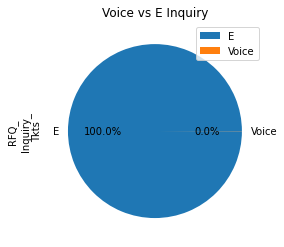

In [320]:
e_vs_voice = MERGED.groupby(['E.Voice'])['RFQ_\nInquiry_\nTkts'].sum()
print (e_vs_voice)

e_vs_voice.plot(kind='pie', autopct = '%1.1f%%', legend=True, title = 'Voice vs E Inquiry')

### First up, lets look at Voice vs E business

In [321]:
voice = MERGED[MERGED["E.Voice"].str.contains("Voice")] 
voice.head(5)

,ï»¿L3_Name,Salesperson,Product,Inquiry_Origin_System,RFQ_\n_Inquiry_\nVol_$m,RFQ_\nExecuted_\nVol_$m,RFQ_\nAverage_Dealers_\nVol,RFQ_\nAdj_Hit_Rate_\n(Vol),RFQ_\nQuote__Rate_\n(Vol),RFQ__\nCover_Rate__\n(Vol),RFQ__\nTied_Rate__\n(Vol),RFQ__\nTied_Conversion_Rate_%_\n(Vol),RFQ_\nInquiry_\nTkts,RFQ_\nExecuted_\nTkts,RFQ_\nAverage_Dealers_\nTkts,RFQ_\nAdj_Hit_Rate_\n(Tkts),RFQ_\nQuote_Rate_\n(Tkts),RFQ__\nCover_Rate__\n(Tkts),RFQ__\nTied_Rate_\n(Tkts),RFQ__\nTied_Conversion_Rate__\n(Tkts),RFQ_\nExecuted_\nDelta_$k,RFQ_\n_Inquiry_\nDelta_$k,RFQ_\nAverage_Dealers_\nDelta,RFQ_\nAdj_Hit_Rate_\n(Delta),RFQ_\nQuote_Rate__\n(Delta),RFQ__\nCover_Rate__\n(Delta),RFQ__\nTied_Rate__\n(Delta),RFQ__\nTied_Conversion_Rate_%_\n(Delta),E.Voice
445,BLUECREST CAPITAL,KWALWASSER,USD IRD,VOX,98730,0,4.0,0%,0%,0%,0%,-,4,0,2.3,0%,50%,0%,0%,-,0,15040,4.0,-,0%,0%,0%,-,Voice
446,VANGUARD GROUP,NOTARO,US Treasuries,VOX,25,0,-,-,100%,-,-,-,1,0,-,-,100%,-,-,-,0,21,-,-,100%,-,-,-,Voice
447,PIMCO,CARRION,US Treasuries,VOX,530,265,-,100%,100%,0%,0%,-,2,1,-,100%,100%,0%,0%,-,71,141,-,-,100%,0%,0%,-,Voice
448,LMR PARTNERS LLP,CELANDER,US Treasuries,VOX,285,285,-,100%,100%,0%,0%,-,3,2,-,100%,67%,0%,0%,-,52,52,-,-,100%,0%,0%,-,Voice
449,DRW INVESTMENTS LLC,MAGALDI,US Treasuries,VOX,90,0,3.0,-,100%,-,-,-,3,0,3.0,-,100%,-,-,-,0,23,3.0,-,100%,-,-,-,Voice


In [322]:
voice.shape

(25, 29)

## There were 14 accounts that inquired for Voice trades in the last 4 weeks


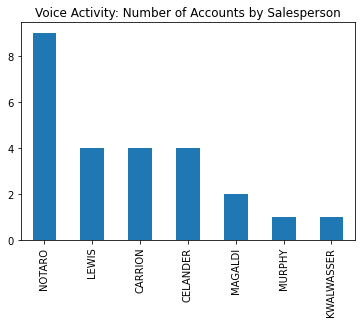

In [323]:
voice.Salesperson.value_counts().plot(kind='bar', title = 'Voice Activity: Number of Accounts by Salesperson')

## All voice trades recorded were US treasuries

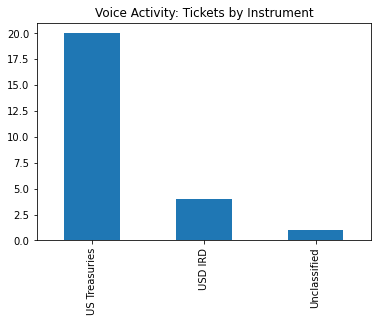

In [324]:
voice.Product.value_counts().plot(kind='bar', title = 'Voice Activity: Tickets by Instrument')

In [325]:
Voicetkts_inq= voice['RFQ_\nInquiry_\nTkts'].sum()
Voicetkts_ex= voice['RFQ_\nExecuted_\nTkts'].sum()


print(Voicetkts_inq)
print(Voicetkts_ex)

58
29


## There were 16 executed voice trades in the last 4 weeks, from a total of 26 inquiries

## 62% Hit Rate

In [326]:
voicesales2 = voice.groupby(['Salesperson'])['RFQ_\nExecuted_\nTkts', 'RFQ_\nInquiry_\nTkts'].sum()
print(voicesales2)

             RFQ_\nExecuted_\nTkts  RFQ_\nInquiry_\nTkts
Salesperson                                             
CARRION                          4                     5
CELANDER                         4                    10
KWALWASSER                       0                     4
LEWIS                            6                     7
MAGALDI                          1                     4
MURPHY                           2                     2
NOTARO                          12                    26


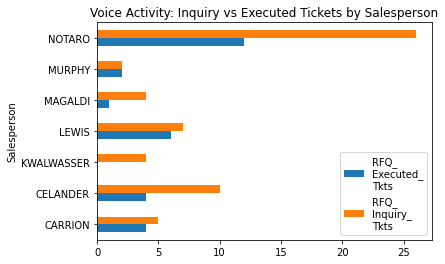

In [327]:
voicesales2.plot.barh(title = 'Voice Activity: Inquiry vs Executed Tickets by Salesperson')

### Inquiry and Executed voice tickets brokedown by Salesperson

## Joe Notaro
### 13 Inquiries, 6 Execution

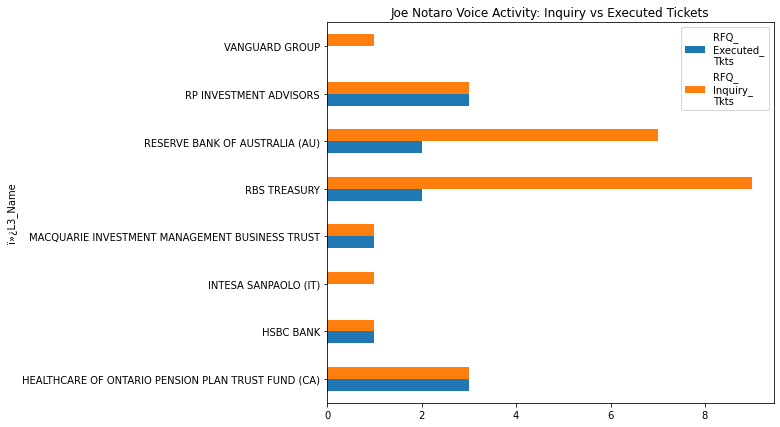

In [328]:
notaro_voice = voice[voice["Salesperson"].str.contains("NOTARO")] 

notaro_voice_client_sales = notaro_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
notaro_voice_client_sales.plot.barh(figsize = (8,7), title = 'Joe Notaro Voice Activity: Inquiry vs Executed Tickets')

## Pete Murphy
### 1 Inquiry, 1 Execution

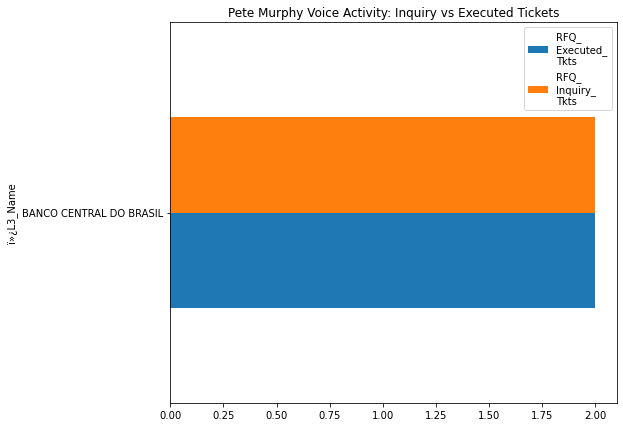

In [329]:
murphy_voice = voice[voice["Salesperson"].str.contains("MURPHY")] 

murphy_voice_client_sales = murphy_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
murphy_voice_client_sales.plot.barh(figsize = (8,7), title = 'Pete Murphy Voice Activity: Inquiry vs Executed Tickets')

## Kyle Lewis
### 5 Inquiries, 5 Executed

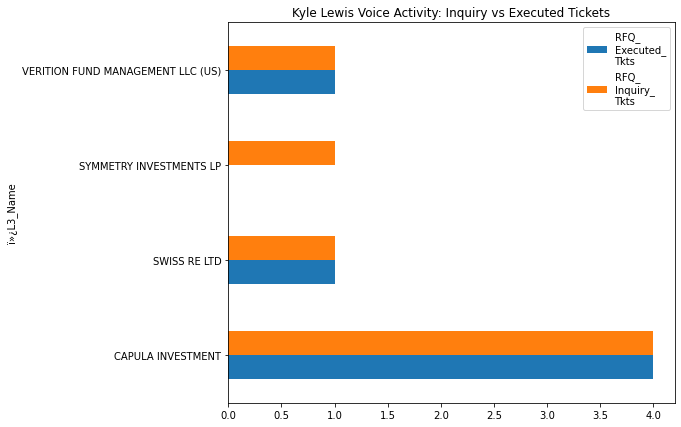

In [330]:
lewis_voice = voice[voice["Salesperson"].str.contains("LEWIS")] 

lewis_voice_client_sales = lewis_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
lewis_voice_client_sales.plot.barh(figsize = (8,7), title = 'Kyle Lewis Voice Activity: Inquiry vs Executed Tickets')

## Harriet Magaldi
### 3 Inquiries, 1 Executed

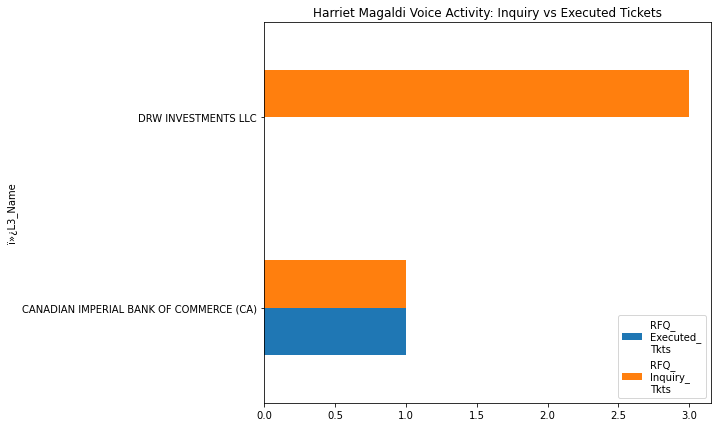

In [331]:
magaldi_voice = voice[voice["Salesperson"].str.contains("MAGALDI")] 

magaldi_voice_client_sales = magaldi_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
magaldi_voice_client_sales.plot.barh(figsize = (8,7), title = 'Harriet Magaldi Voice Activity: Inquiry vs Executed Tickets')

## Scott Celander
### 1 Inquiry, 1 Executed

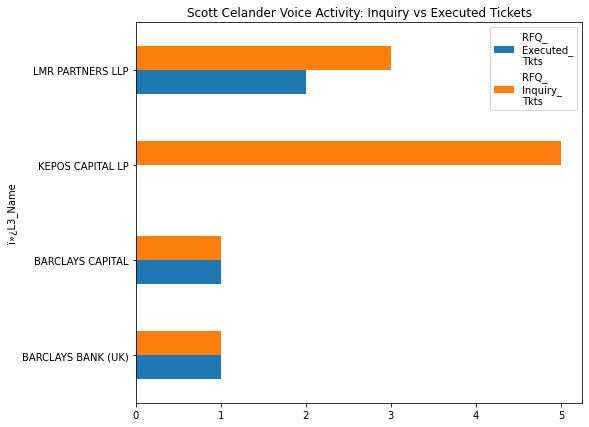

In [332]:
celander_voice = voice[voice["Salesperson"].str.contains("CELANDER")] 

celander_voice_client_sales = celander_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
celander_voice_client_sales.plot.barh(figsize = (8,7), title = 'Scott Celander Voice Activity: Inquiry vs Executed Tickets')

## Marcial Carrion
### 3 Inquiries, 2 Executed

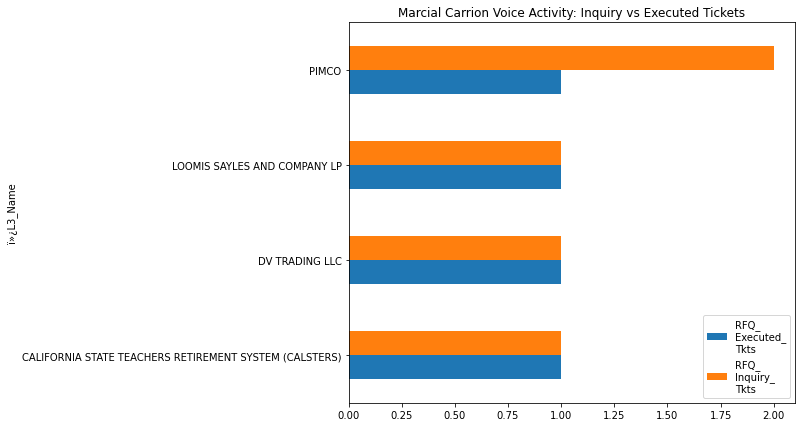

In [333]:
carrion_voice = voice[voice["Salesperson"].str.contains("CARRION")] 

carrion_voice_client_sales = carrion_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
carrion_voice_client_sales.plot.barh(figsize = (8,7), title = 'Marcial Carrion Voice Activity: Inquiry vs Executed Tickets')

## Brian Kelly
### No Voice Business

In [334]:
#kelly_voice = voice[voice["Salesperson"].str.contains("KELLY")] 

#kelly_voice_client_sales = kelly_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
#kelly_voice_client_sales.plot.barh(figsize = (8,7), title = 'Brian Kelly Voice Activity: Inquiry vs Executed Tickets')

## George Reilly
### No Voice Business

In [335]:
#reilly_voice = voice[voice["Salesperson"].str.contains("REILLY")] 

#reilly_voice_client_sales = reilly_voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
#reilly_voice_client_sales.plot.barh(figsize = (8,7), title = 'George Reilly Voice Activity: Inquiry vs Executed Tickets')

In [336]:
voice_client_sales = voice.groupby(['ï»¿L3_Name'])['RFQ_\nExecuted_\nTkts',  'RFQ_\nInquiry_\nTkts'].sum()
voice_client_sales.loc[voice_client_sales['RFQ_\nInquiry_\nTkts'] > 0]
print(voice_client_sales)

                                                    RFQ_\nExecuted_\nTkts  \
ï»¿L3_Name                                                                  
BANCO CENTRAL DO BRASIL                                                 2   
BARCLAYS BANK (UK)                                                      1   
BARCLAYS CAPITAL                                                        1   
BLUECREST CAPITAL                                                       0   
CALIFORNIA STATE TEACHERS RETIREMENT SYSTEM (CA...                      1   
CANADIAN IMPERIAL BANK OF COMMERCE (CA)                                 1   
CAPULA INVESTMENT                                                       4   
DRW INVESTMENTS LLC                                                     0   
DV TRADING LLC                                                          1   
HEALTHCARE OF ONTARIO PENSION PLAN TRUST FUND (CA)                      3   
HSBC BANK                                                               1   

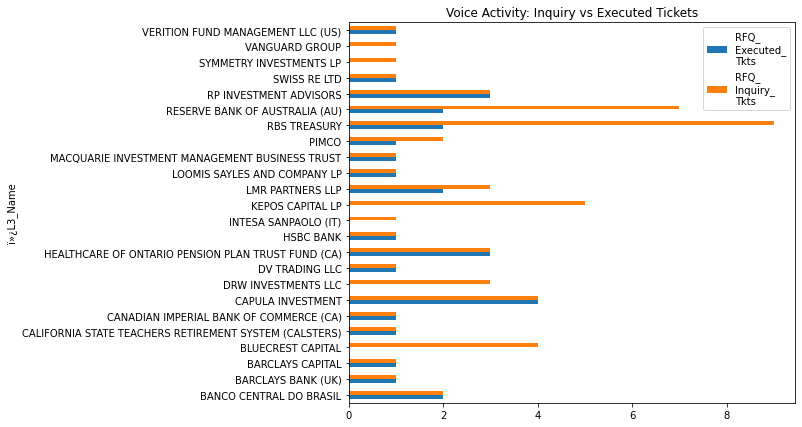

In [337]:
voice_client_sales.plot.barh(figsize = (8,7), title = 'Voice Activity: Inquiry vs Executed Tickets')

In [338]:
voice_client_sales_notional = voice.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()

## Voice Activity: Inquiry vs Executed Notional by client

####  * Pimco inquired for the highest volume but executed less than half of it. 
####  * 9 of the 14 accounts to inquire executed 100% of inquiry volume. 
####  * DRW & Vanguard were the only accounts with no execution

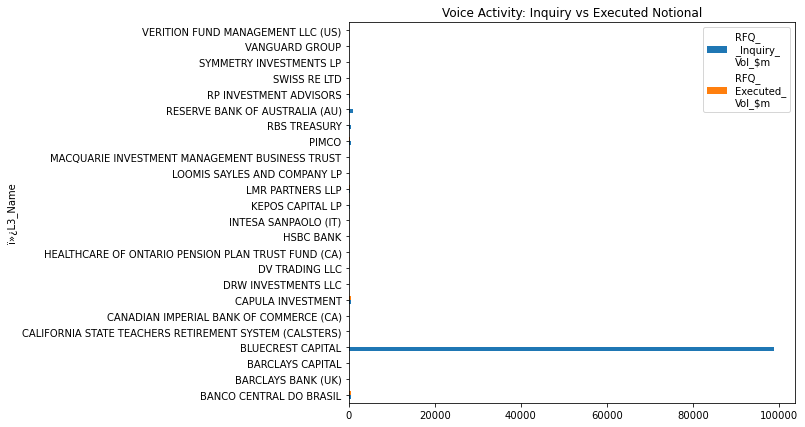

In [339]:
voice_client_sales_notional.plot.barh(figsize = (8,7), title = 'Voice Activity: Inquiry vs Executed Notional')

# Delta
### Kyle Lewis was responsible for more Delta than any other salesperson
### Joe Notaro was the only other salesperson to print over 100k dv01

In [340]:
voice_delta = voice.groupby(['Salesperson'])['RFQ_\n_Inquiry_\nDelta_$k',  'RFQ_\nExecuted_\nDelta_$k'].sum()
print(voice_delta)

             RFQ_\n_Inquiry_\nDelta_$k  RFQ_\nExecuted_\nDelta_$k
Salesperson                                                      
CARRION                            158                         88
CELANDER                           146                         99
KWALWASSER                       15040                          0
LEWIS                              303                        252
MAGALDI                             55                         32
MURPHY                             185                        185
NOTARO                             356                        208


In [341]:
delta = voice_delta['RFQ_\nExecuted_\nDelta_$k'].sum()
print(delta)

864


### 864k DELTA WAS EXECUTED OVERALL

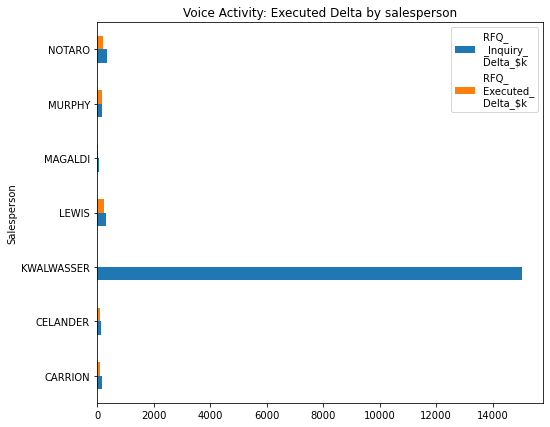

In [342]:
voice_delta.plot.barh(figsize = (8,7), title = 'Voice Activity: Executed Delta by salesperson')

### Most Delta was executed with Capula
### Despite high inquiry and execution, RBS Treasury Delta is 40k

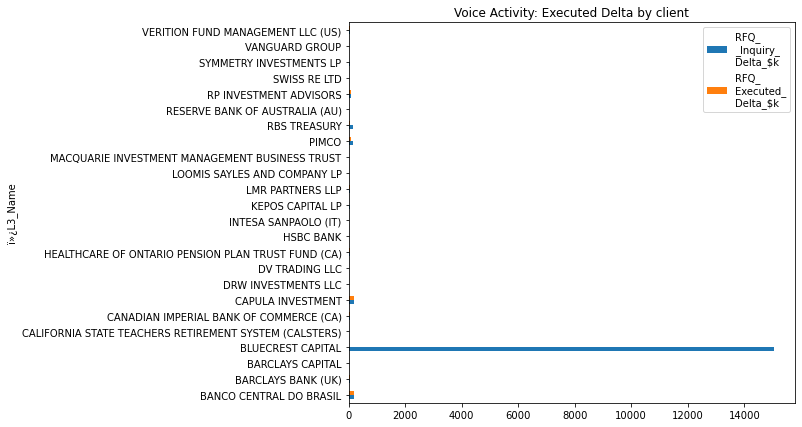

In [343]:
client_voice_delta = voice.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nDelta_$k',  'RFQ_\nExecuted_\nDelta_$k'].sum()
client_voice_delta.plot.barh(figsize = (8,7), title = 'Voice Activity: Executed Delta by client')

# E-Business

In [344]:
e = MERGED[MERGED["E.Voice"].str.contains("E")] 
e.head(5)

,ï»¿L3_Name,Salesperson,Product,Inquiry_Origin_System,RFQ_\n_Inquiry_\nVol_$m,RFQ_\nExecuted_\nVol_$m,RFQ_\nAverage_Dealers_\nVol,RFQ_\nAdj_Hit_Rate_\n(Vol),RFQ_\nQuote__Rate_\n(Vol),RFQ__\nCover_Rate__\n(Vol),RFQ__\nTied_Rate__\n(Vol),RFQ__\nTied_Conversion_Rate_%_\n(Vol),RFQ_\nInquiry_\nTkts,RFQ_\nExecuted_\nTkts,RFQ_\nAverage_Dealers_\nTkts,RFQ_\nAdj_Hit_Rate_\n(Tkts),RFQ_\nQuote_Rate_\n(Tkts),RFQ__\nCover_Rate__\n(Tkts),RFQ__\nTied_Rate_\n(Tkts),RFQ__\nTied_Conversion_Rate__\n(Tkts),RFQ_\nExecuted_\nDelta_$k,RFQ_\n_Inquiry_\nDelta_$k,RFQ_\nAverage_Dealers_\nDelta,RFQ_\nAdj_Hit_Rate_\n(Delta),RFQ_\nQuote_Rate__\n(Delta),RFQ__\nCover_Rate__\n(Delta),RFQ__\nTied_Rate__\n(Delta),RFQ__\nTied_Conversion_Rate_%_\n(Delta),E.Voice
0,COMMONWEALTH BANK OF AUSTRALIA (AU),NOTARO,USD IRD,BET,49963,1687,6.0,3%,69%,10%,0%,-,81,3,5.9,4%,79%,10%,0%,-,15,1008,6.0,-,76%,7%,0%,-,E
1,UBS ASSET MANAGEMENT,KELLY,US Treasuries,BET,27257,4826,4.9,21%,93%,41%,11%,61%,9418,2136,5.0,23%,98%,43%,0%,26%,851,5085,5.0,-,93%,39%,8%,63%,E
2,UBS ASSET MANAGEMENT,KELLY,US Agencies,BET,139,27,11.4,39%,63%,4%,0%,-,418,10,12.2,40%,8%,10%,0%,-,3,39,11.8,-,78%,3%,0%,-,E
3,UBS ASSET MANAGEMENT,KELLY,USD SSA,BET,5,0,55.4,-,0%,0%,0%,-,3,0,1.5,-,0%,0%,0%,-,0,0,27.0,-,0%,0%,0%,-,E
4,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,KWALWASSER,US Treasuries,BET,26452,713,4.4,6%,65%,32%,3%,39%,23400,1232,4.5,6%,98%,35%,0%,31%,67,3378,4.6,-,49%,32%,4%,36%,E


In [345]:
e.shape

(446, 29)

### 136 accounts inquired electronically in the last 4 weeks

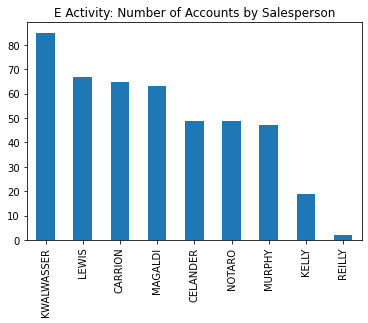

In [346]:
e.Salesperson.value_counts().plot(kind='bar', title = 'E Activity: Number of Accounts by Salesperson')

### Unlike voice activity, e business was not just UST, however it is all cash products.

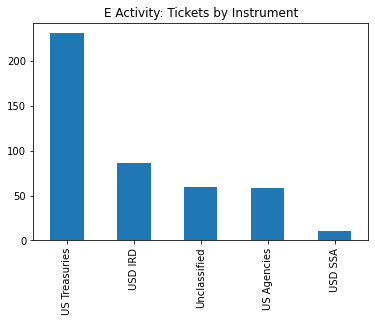

In [347]:
e.Product.value_counts().plot(kind='bar', title = 'E Activity: Tickets by Instrument')

In [348]:
etkts_inq= e['RFQ_\nInquiry_\nTkts'].sum()
etkts_ex= e['RFQ_\nExecuted_\nTkts'].sum()


print(etkts_inq)
print(etkts_ex)

205140
26713


## There were 9,794 inquiries and 2,274 executed tickets. 
## A hit rate of 23%.

In [349]:
evol_inq= e['RFQ_\n_Inquiry_\nVol_$m'].sum()
evol_ex= e['RFQ_\nExecuted_\nVol_$m'].sum()


print(evol_inq)
print(evol_ex)

1140694
93223


## The notional inquired was 24,013mm, with 6,680mm executed.
## A hit rate of 28%

In [350]:
esales2 = e.groupby(['Salesperson'])['RFQ_\nInquiry_\nTkts', 'RFQ_\nExecuted_\nTkts'].sum()
print(esales2)

             RFQ_\nInquiry_\nTkts  RFQ_\nExecuted_\nTkts
Salesperson                                             
CARRION                     64925                   7598
CELANDER                    15822                   1517
KELLY                       12477                   2593
KWALWASSER                  46770                   4812
LEWIS                       31029                   4106
MAGALDI                     10385                   1529
MURPHY                       7613                    541
NOTARO                      16092                   4012
REILLY                         27                      5


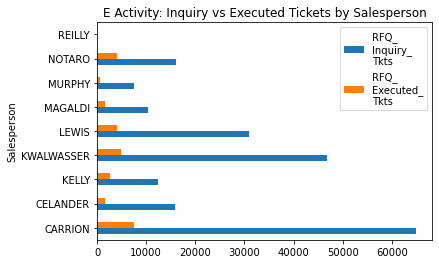

In [351]:
esales2.plot.barh(title = 'E Activity: Inquiry vs Executed Tickets by Salesperson')

### Inquiry and Executed voice tickets brokedown by Salesperson

## Joe Notaro
### 1,737 Inquiry Tkts, 528 Executed
### <span style='color:Green'> 30% Hit Rate (Tkts)

### 13,082 Inquiry Tkts, 888 Executed
### <span style='color:Red'> 7% Hit Rate (Tkts)

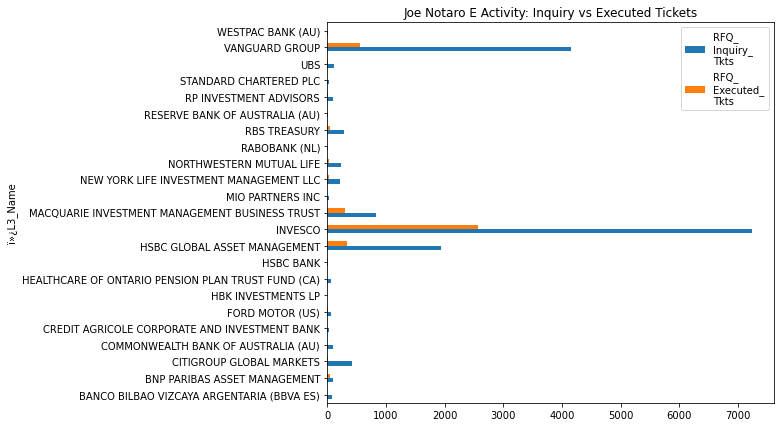

In [352]:
notaro_e = e[e["Salesperson"].str.contains("NOTARO")] 

notaro_e_client_sales = notaro_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts','RFQ_\nExecuted_\nTkts' ].sum()
notaro_e_client_sales.plot.barh(figsize = (8,7), title = 'Joe Notaro E Activity: Inquiry vs Executed Tickets')

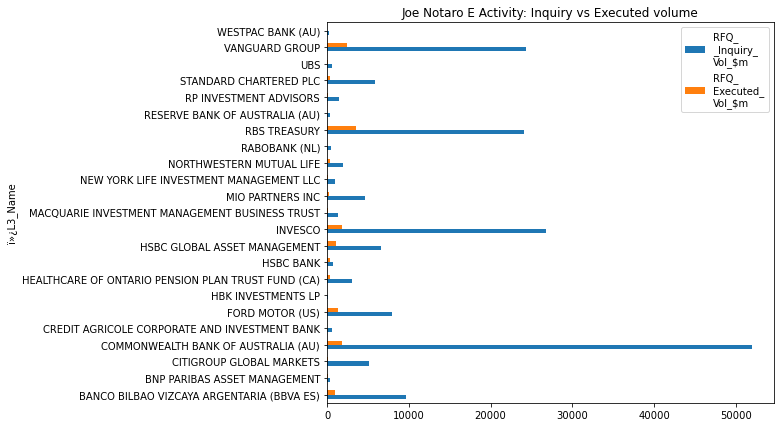

In [353]:
notaro_e_vol = e[e["Salesperson"].str.contains("NOTARO")] 

notaro_e_vol_client_sales = notaro_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
notaro_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Joe Notaro E Activity: Inquiry vs Executed volume')

In [354]:
notaro_etkts_inq= notaro_e['RFQ_\nInquiry_\nTkts'].sum()
notaro_etkts_ex= notaro_e['RFQ_\nExecuted_\nTkts'].sum()


print(notaro_etkts_inq)
print(notaro_etkts_ex)

16092
4012


In [355]:
notaro_evol_inq= notaro_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
notaro_evol_ex= notaro_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()


print(notaro_evol_inq)
print(notaro_evol_ex)

179303
15411


## Pete Murphy
### 1,092 Inquiry Tkts, 62 Executed
###  <span style='color:Red'> 6% Hit Rate Tkts

### 15,117 Inquiry Vol, 1,612 Executed 
### <span style='color:Red'> 10% Hit Rate Vol


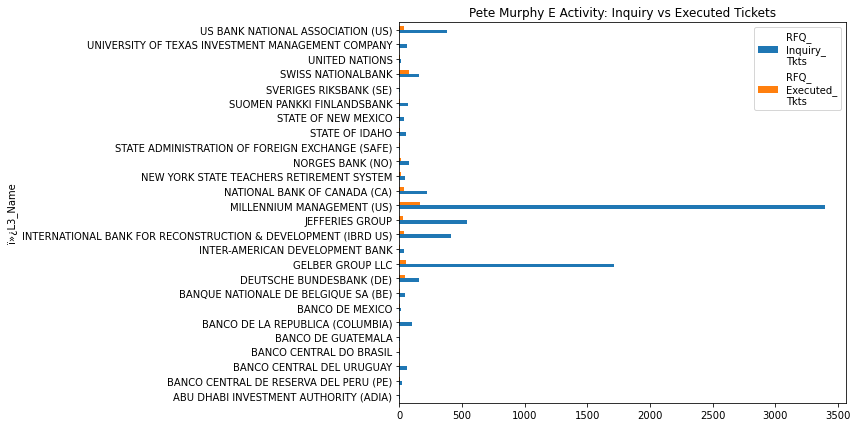

In [356]:
murphy_e = e[e["Salesperson"].str.contains("MURPHY")] 

murphy_e_client_sales = murphy_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts' ].sum()
murphy_e_client_sales.plot.barh(figsize = (8,7), title = 'Pete Murphy E Activity: Inquiry vs Executed Tickets')

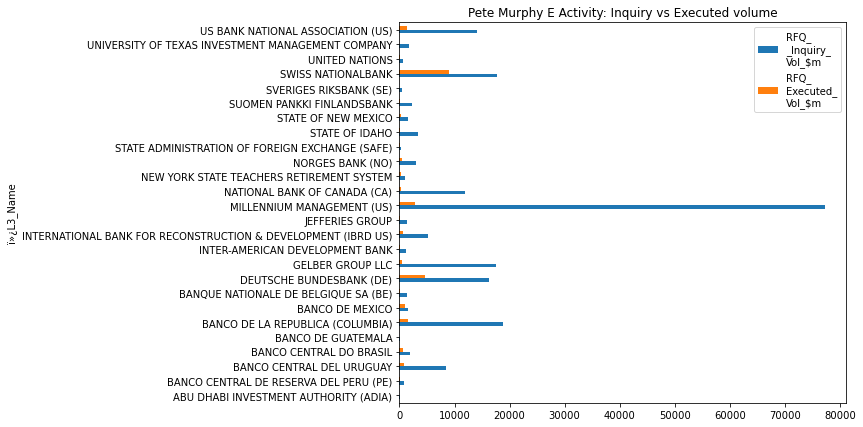

In [357]:
murphy_e_vol = e[e["Salesperson"].str.contains("MURPHY")] 

murphy_e_vol_client_sales = murphy_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
murphy_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Pete Murphy E Activity: Inquiry vs Executed volume')

In [358]:
murphy_etkts_inq= murphy_e['RFQ_\nInquiry_\nTkts'].sum()
murphy_etkts_ex= murphy_e['RFQ_\nExecuted_\nTkts'].sum()


print(murphy_etkts_inq)
print(murphy_etkts_ex)

7613
541


In [359]:
murphy_evol_inq= murphy_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
murphy_evol_ex= murphy_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()


print(murphy_evol_inq)
print(murphy_evol_ex)
murphy_vol_hit_rate = murphy_evol_ex/murphy_evol_inq

print(murphy_vol_hit_rate)

209957
24685
0.1175716932514753


## Kyle Lewis
### 2,357 Inquiry Tkts, 678 Executed
### <span style='color:Green'>29% Hit Rate Tkts

### 11,148 Inquiry Vol, 1,434 Executed
### <span style='color:Red'>12% Hit Rate Vol

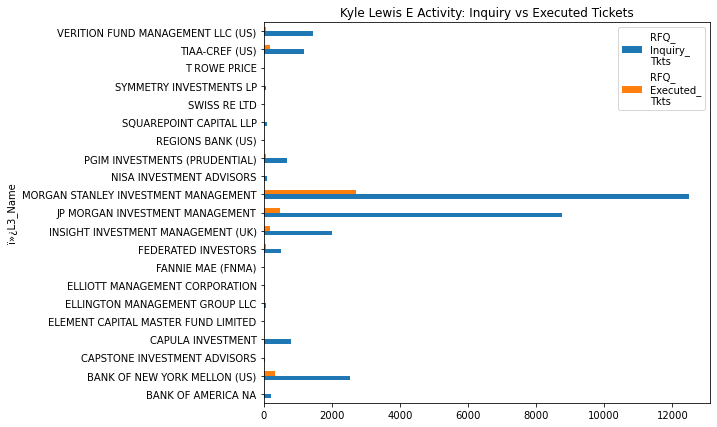

In [360]:
lewis_e = e[e["Salesperson"].str.contains("LEWIS")] 

lewis_e_client_sales = lewis_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts' ].sum()
lewis_e_client_sales.plot.barh(figsize = (8,7), title = 'Kyle Lewis E Activity: Inquiry vs Executed Tickets')

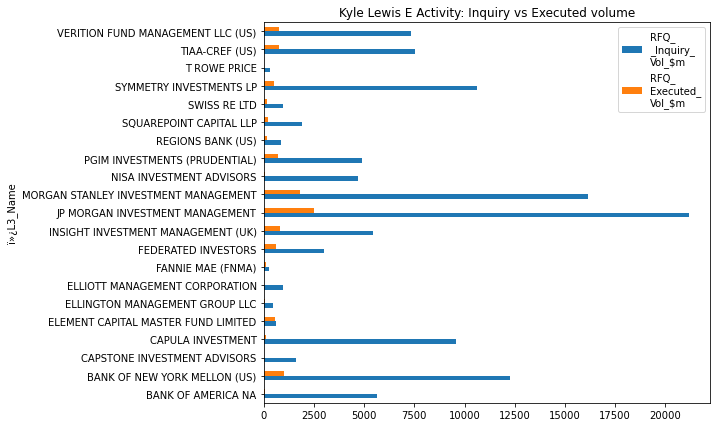

In [361]:
lewis_e_vol = e[e["Salesperson"].str.contains("LEWIS")] 

lewis_e_vol_client_sales = lewis_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
lewis_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Kyle Lewis E Activity: Inquiry vs Executed volume')

In [362]:
lewis_etkts_inq= lewis_e['RFQ_\nInquiry_\nTkts'].sum()
lewis_etkts_ex= lewis_e['RFQ_\nExecuted_\nTkts'].sum()


print(lewis_etkts_inq)
print(lewis_etkts_ex)

31029
4106


In [363]:
lewis_evol_inq= lewis_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
lewis_evol_ex= lewis_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()


print(lewis_evol_inq)
print(lewis_evol_ex)
lewis_vol_hit_rate = lewis_evol_ex/lewis_evol_inq

print(lewis_vol_hit_rate)

116106
11017
0.09488743045148398


## Harriet Magaldi
### 919 Inquiry Tkts, 171 Executed
### <span style='color:Green'>19% Hit Rate Tickets

### 2,332 Inquiry Tkts, 58 Executed
### <span style='color:Red'>2% Hit Rate Vol

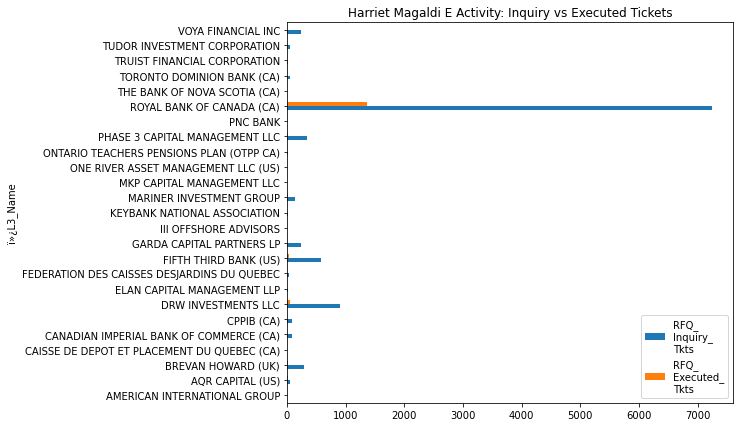

In [364]:
magaldi_e = e[e["Salesperson"].str.contains("MAGALDI")] 

magaldi_e_client_sales = magaldi_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts'].sum()
magaldi_e_client_sales.plot.barh(figsize = (8,7), title = 'Harriet Magaldi E Activity: Inquiry vs Executed Tickets')

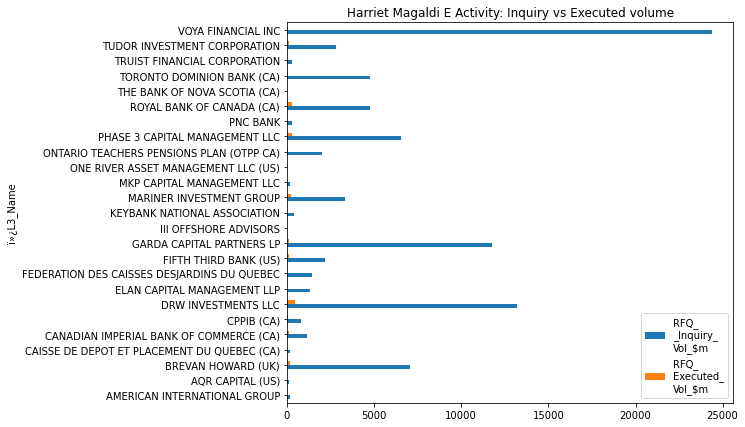

In [365]:
magaldi_e_vol = e[e["Salesperson"].str.contains("MAGALDI")] 

magaldi_e_vol_client_sales = magaldi_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
magaldi_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Harriet Magaldi E Activity: Inquiry vs Executed volume')

In [366]:
magaldi_etkts_inq= magaldi_e['RFQ_\nInquiry_\nTkts'].sum()
magaldi_etkts_ex= magaldi_e['RFQ_\nExecuted_\nTkts'].sum()


print(magaldi_etkts_inq)
print(magaldi_etkts_ex)

10385
1529


In [367]:
magaldi_evol_inq= magaldi_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
magaldi_evol_ex= magaldi_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()


print(magaldi_evol_inq)
print(magaldi_evol_ex)
magaldi_vol_hit_rate = magaldi_evol_ex/magaldi_evol_inq

print(magaldi_vol_hit_rate)

89076
2276
0.025551214693071086


## Scott Celander
### 1,827 Inquiry Tkts, 161 Executed
### <span style='color:Red'>9% Hit Rate

### 7,525 Inquiry Tkts, 434 Executed
### <span style='color:Red'>6% Hit Rate vol


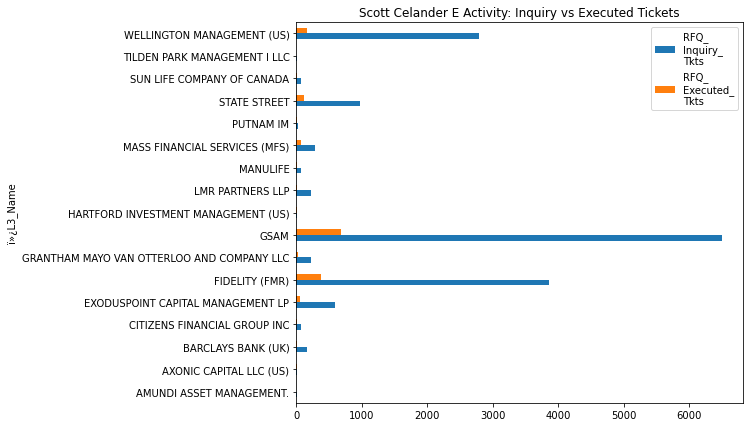

In [368]:
celander_e = e[e["Salesperson"].str.contains("CELANDER")] 

celander_e_client_sales = celander_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts'].sum()
celander_e_client_sales.plot.barh(figsize = (8,7), title = 'Scott Celander E Activity: Inquiry vs Executed Tickets')

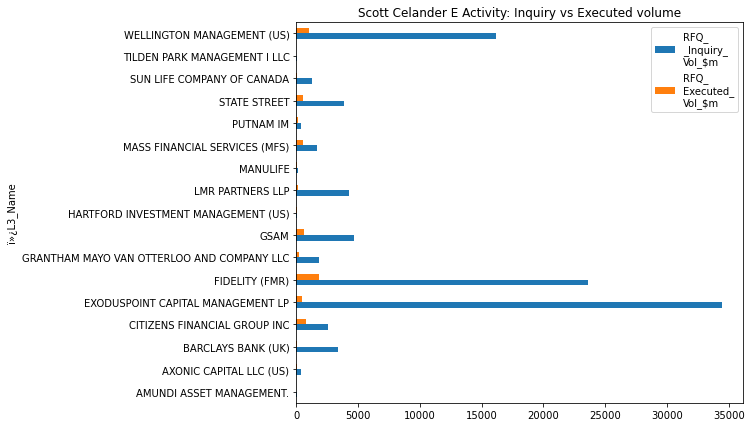

In [369]:
celander_e_vol = e[e["Salesperson"].str.contains("CELANDER")] 

celander_e_vol_client_sales = celander_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
celander_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Scott Celander E Activity: Inquiry vs Executed volume')

In [370]:
celander_etkts_inq= celander_e['RFQ_\nInquiry_\nTkts'].sum()
celander_etkts_ex= celander_e['RFQ_\nExecuted_\nTkts'].sum()


print(celander_etkts_inq)
print(celander_etkts_ex)

15822
1517


In [371]:
celander_evol_inq= celander_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
celander_evol_ex= celander_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()


print(celander_evol_inq)
print(celander_evol_ex)
celander_vol_hit_rate = celander_evol_ex/celander_evol_inq

print(celander_vol_hit_rate)

98453
6354
0.06453840919017197


## Marcial Carrion
### 1,193 Inquiry Tkts, 294 Executed
### <span style='color:Green'>25% Hit Rate

### 9788 Inquiry Vol, 1,553 Executed
### <span style='color:Red'>16% Hit Rate

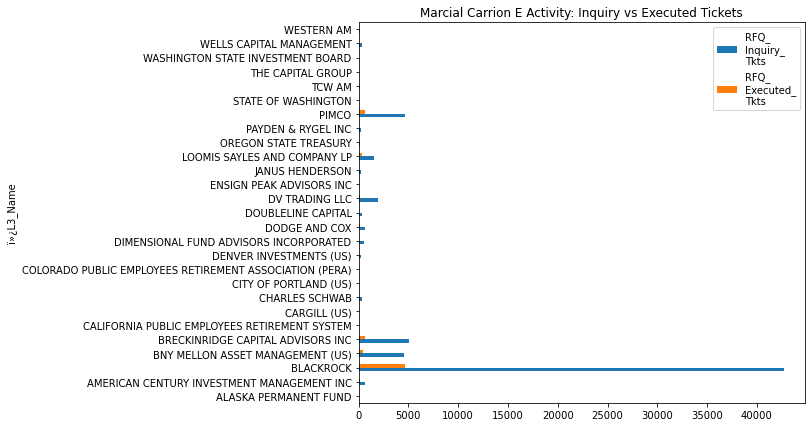

In [372]:
carrion_e = e[e["Salesperson"].str.contains("CARRION")] 

carrion_e_client_sales = carrion_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts'].sum()
carrion_e_client_sales.plot.barh(figsize = (8,7), title = 'Marcial Carrion E Activity: Inquiry vs Executed Tickets')

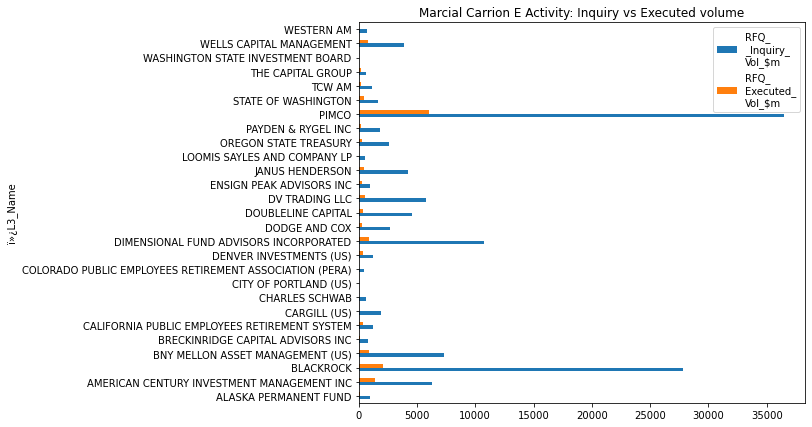

In [373]:
carrion_e_vol = e[e["Salesperson"].str.contains("CARRION")] 

carrion_e_vol_client_sales = carrion_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
carrion_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Marcial Carrion E Activity: Inquiry vs Executed volume')

In [374]:
carrion_etkts_inq= carrion_e['RFQ_\nInquiry_\nTkts'].sum()
carrion_etkts_ex= carrion_e['RFQ_\nExecuted_\nTkts'].sum()


print(carrion_etkts_inq)
print(carrion_etkts_ex)

64925
7598


In [375]:
carrion_evol_inq= carrion_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
carrion_evol_ex= carrion_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()


print(carrion_evol_inq)
print(carrion_evol_ex)
carrion_vol_hit_rate = carrion_evol_ex/carrion_evol_inq

print(carrion_vol_hit_rate)

127370
16627
0.13054094370730943


## Brian Kelly
### 1,526 Inquiry Tkts, 380 Executed
### <span style='color:Green'>25% Hit Rate Tickets

### 6711 Inquiry Vol, 686 Executed
### <span style='color:Red'>10% Hit Rate vol

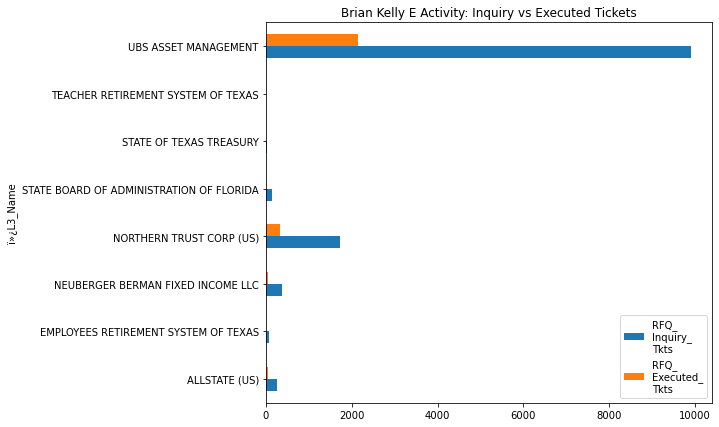

In [376]:
kelly_e = e[e["Salesperson"].str.contains("KELLY")] 

kelly_e_client_sales = kelly_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts'].sum()
kelly_e_client_sales.plot.barh(figsize = (8,7), title = 'Brian Kelly E Activity: Inquiry vs Executed Tickets')

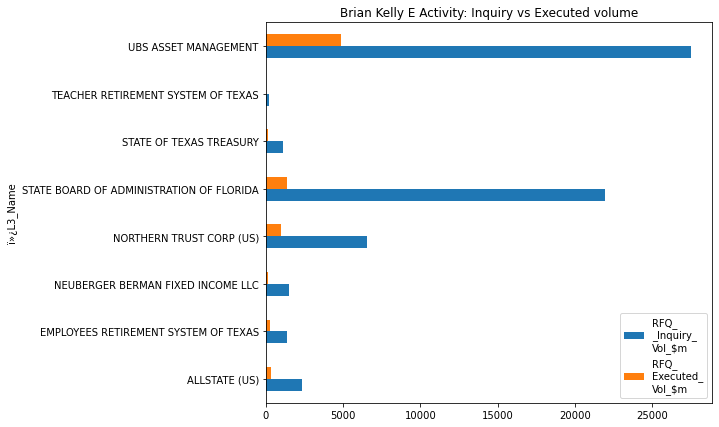

In [377]:
kelly_e_vol = e[e["Salesperson"].str.contains("KELLY")] 

kelly_e_vol_client_sales = kelly_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
kelly_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'Brian Kelly E Activity: Inquiry vs Executed volume')

In [378]:
kelly_etkts_inq= kelly_e['RFQ_\nInquiry_\nTkts'].sum()
kelly_etkts_ex= kelly_e['RFQ_\nExecuted_\nTkts'].sum()
kelly_etkts_hit_rate = kelly_etkts_ex/kelly_etkts_inq

print(kelly_etkts_inq)
print(kelly_etkts_ex)
print(kelly_etkts_hit_rate)

12477
2593
0.20782239320349444


In [379]:
kelly_evol_inq= kelly_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
kelly_evol_ex= kelly_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()
kelly_vol_hit_rate = kelly_evol_ex/kelly_evol_inq

print(kelly_evol_inq)
print(kelly_evol_ex)
print(kelly_vol_hit_rate)

62473
8060
0.1290157347974325


## George Reilly
## No Activity

In [380]:
#reilly_e = e[e["Salesperson"].str.contains("REILLY")] 

#reilly_e_client_sales = reilly_e.groupby(['ï»¿L3_Name'])['RFQ_\nInquiry_\nTkts' , 'RFQ_\nExecuted_\nTkts'  ].sum()
#reilly_e_client_sales.plot.barh(figsize = (8,7), title = 'George Reilly E Activity: Inquiry vs Executed Tickets')

In [381]:
#reilly_e_vol = e[e["Salesperson"].str.contains("REILLY")] 

#reilly_e_vol_client_sales = reilly_e_vol.groupby(['ï»¿L3_Name'])['RFQ_\n_Inquiry_\nVol_$m', 'RFQ_\nExecuted_\nVol_$m'].sum()
#reilly_e_vol_client_sales.plot.barh(figsize = (8,7), title = 'George Reilly E Activity: Inquiry vs Executed volume')

In [382]:
#reilly_etkts_inq= reilly_e['RFQ_\nInquiry_\nTkts'].sum()
#reilly_etkts_ex= reilly_e['RFQ_\nExecuted_\nTkts'].sum()
#reilly_etkts_hit_rate = reilly_etkts_ex/reilly_etkts_inq

#print(reilly_etkts_inq)
#print(reilly_etkts_ex)
#print(reilly_etkts_hit_rate)

In [383]:
#reilly_evol_inq= reilly_e_vol['RFQ_\n_Inquiry_\nVol_$m'].sum()
#reilly_evol_ex= reilly_e_vol['RFQ_\nExecuted_\nVol_$m'].sum()
#reilly_vol_hit_rate = reilly_evol_ex/kelly_evol_inq

#print(reilly_evol_inq)
#print(reilly_evol_ex)
#print(reilly_vol_hit_rate)

### YTD NUMBER OF TRADES BY SALESPERSON & PRODUCT

In [384]:
#MERGED

ytd = MERGED.groupby(['Salesperson', 'Product'])['RFQ_\nInquiry_\nTkts', 'RFQ_\n_Inquiry_\nDelta_$k', 'RFQ_\nExecuted_\nDelta_$k', 'RFQ_\nExecuted_\nTkts'].sum()
ytd_ex_tkts = MERGED.groupby(['Salesperson', 'Product'])['RFQ_\nExecuted_\nTkts'].sum()


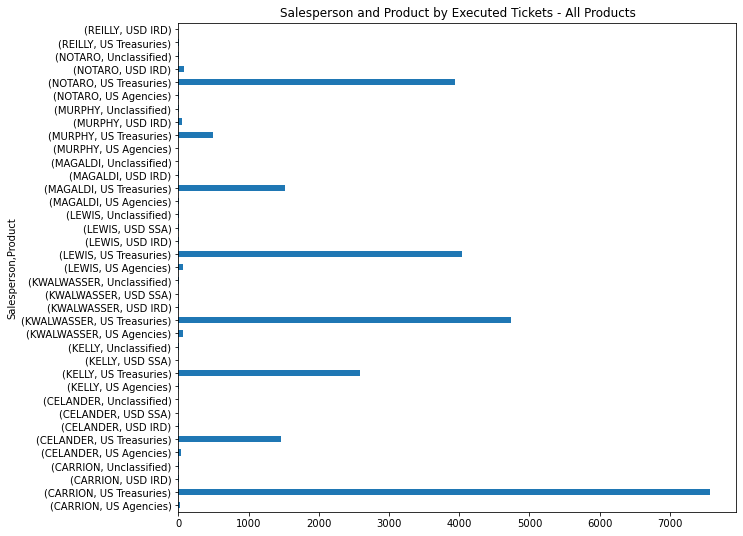

In [412]:
ytd_ex_tkts.plot.barh(figsize = (10,9), title = 'Salesperson and Product by Executed Tickets - All Products')

### YTD NUMBER OF TRADES BY SALESPERSON & PRODUCT - excluding UST

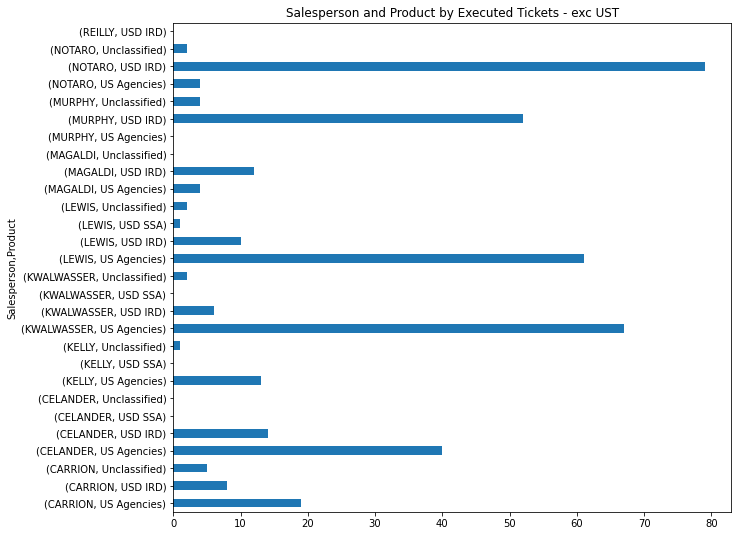

In [414]:
ytd_ex_tkts_no_ust1 = MERGED[MERGED["Product"].str.contains("US Treasuries") == False]
ytd_ex_tkts_no_ust = ytd_ex_tkts_no_ust1.groupby(['Salesperson', 'Product'])['RFQ_\nExecuted_\nTkts'].sum()

ytd_ex_tkts_no_ust.plot.barh(figsize = (10,9), title = 'Salesperson and Product by Executed Tickets - exc UST')

### YTD Delta BY SALESPERSON & PRODUCT

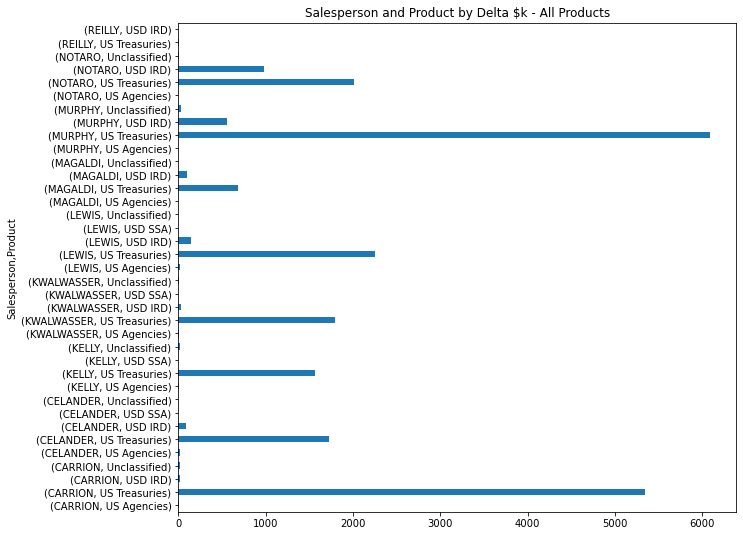

In [415]:
#MERGED

ytd = MERGED.groupby(['Salesperson', 'Product'])['RFQ_\nInquiry_\nTkts', 'RFQ_\n_Inquiry_\nDelta_$k', 'RFQ_\nExecuted_\nDelta_$k', 'RFQ_\nExecuted_\nTkts'].sum()
ytd_ex_delta = MERGED.groupby(['Salesperson', 'Product'])['RFQ_\nExecuted_\nDelta_$k'].sum()

ytd_ex_delta.plot.barh(figsize = (10,9), title = 'Salesperson and Product by Delta $k - All Products')

### YTD Delta BY SALESPERSON & PRODUCT - excluding UST

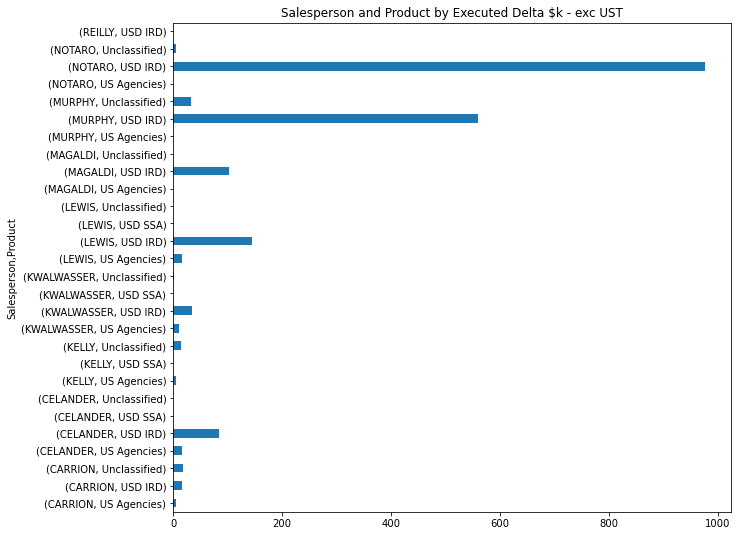

In [416]:
ytd_ex_delta_no_ust1 = MERGED[MERGED["Product"].str.contains("US Treasuries") == False]
ytd_ex_delta_no_ust = ytd_ex_delta_no_ust1.groupby(['Salesperson', 'Product'])['RFQ_\nExecuted_\nDelta_$k'].sum()

ytd_ex_delta_no_ust.plot.barh(figsize = (10,9), title = 'Salesperson and Product by Executed Delta $k - exc UST')

### Average Delta per Ticket by Salesperson

In [417]:
avg_delta = MERGED.groupby(['Salesperson', 'Product'])[ 'RFQ_\nExecuted_\nDelta_$k', 'RFQ_\nExecuted_\nTkts'].sum()

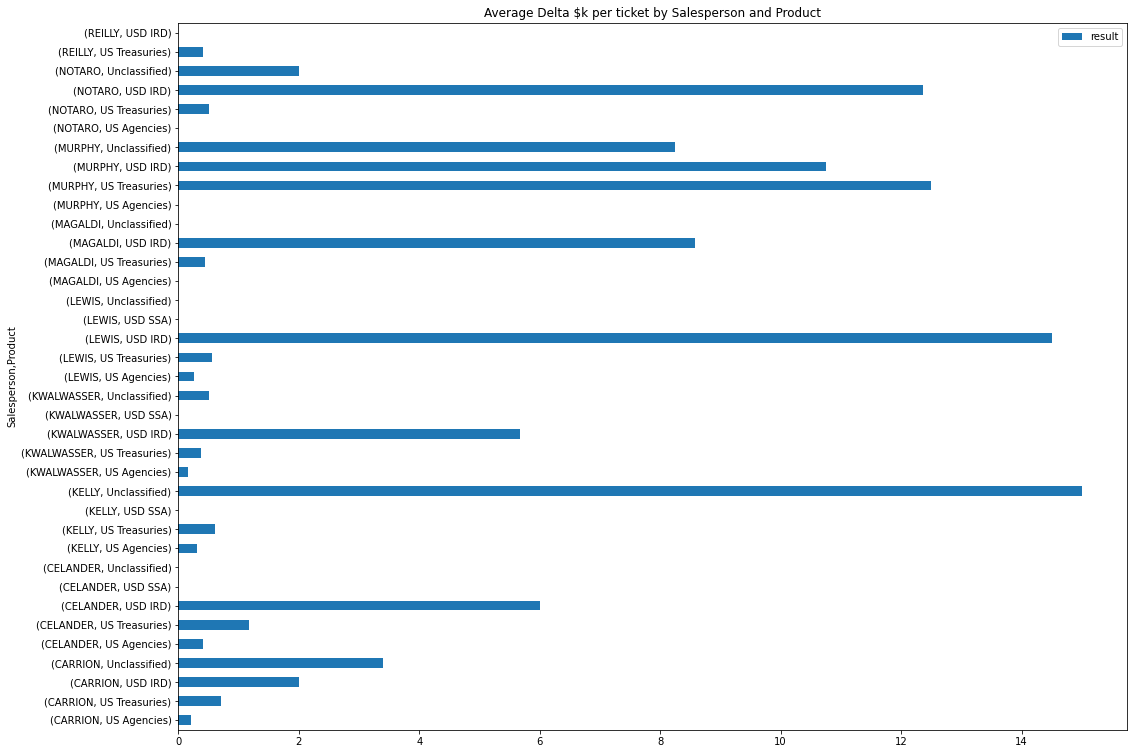

In [439]:
avg_delta["result"] = avg_delta["RFQ_\nExecuted_\nDelta_$k"].div(avg_delta["RFQ_\nExecuted_\nTkts"].values)
avg_delta2 = avg_delta.fillna(0)

avg_delta3 =  avg_delta2.filter(items = ['result'])
avg_delta3.plot.barh(figsize = (17,13),  title = 'Average Delta $k per ticket by Salesperson and Product')

# Reccomendations
    ### 1. Increase voice trade capture, there are no swaps or options currently captured by Flow Sales for US Rates Sales
    
    ### 2. Improve voice RFQ capture, hit rate is 62% which is likely because sales primarily capture wins, instead of all           activity
    
    ### 3. Establish voice business target - how many voice trades should sales be aiming to get on a weekly basis, both             individiually and cumulatively.

    ### 4. There is a sharp drop in hit rates when looking at vol vs tickets, indicating that larger size has a lower hit           rate.
    
    ### 5. Discuss plans for accounts with high inquiry and low execution - GSAM, Royal Bank of Canada, JPMIM, Gelber,               Milenium...eithe E only or improved tiering.